In [3]:
from sklearn.datasets import make_circles
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt


# Make 2000 samples 
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same value

In [4]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [5]:
print(f"Last 5 X features:\n{X[5:]}") #Wink wink numpy slicing
print(f"\Last 5 y labels:\n{y[5:]}")

Last 5 X features:
tensor([[-0.1930,  0.7703],
        [ 1.0001, -0.3373],
        [-0.1127, -0.8118],
        ...,
        [ 0.6222, -0.7182],
        [-0.7904,  0.1368],
        [ 0.5993,  0.5590]])
\Last 5 y labels:
tensor([1., 0., 1.,  ..., 0., 1., 1.])


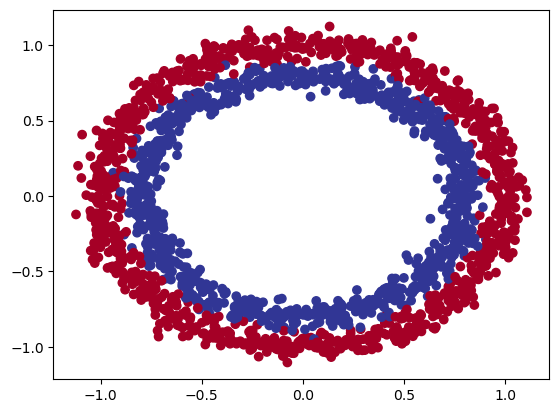

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [7]:
#ex1
print(X.shape)
print(X[100], X[101], X[102])

torch.Size([2000, 2])
tensor([ 0.8584, -0.5488]) tensor([0.9623, 0.0178]) tensor([-0.8476,  0.4619])


In [9]:
from sklearn.model_selection import train_test_split
#Your code here

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible
y_train = y_train.unsqueeze(1)

In [10]:
#ex3
class DumbPerceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DumbPerceptron, self).__init__()
        self.layer1 = torch.nn.Linear(input_dim, 512) # takes in {input_dim}  features (X), produces {output_dim} features
        self.layer2 = torch.nn.Linear(512, output_dim)
        
    def forward(self, x):
        x = self.layer2(self.layer1(x))
        return x

In [11]:
dumbModel = DumbPerceptron(2, 1)
dumbModel

DumbPerceptron(
  (layer1): Linear(in_features=2, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=1, bias=True)
)

In [12]:
#ex4
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(dumbModel.parameters(), lr=0.1)

In [14]:
from utils import plot_decision_boundary

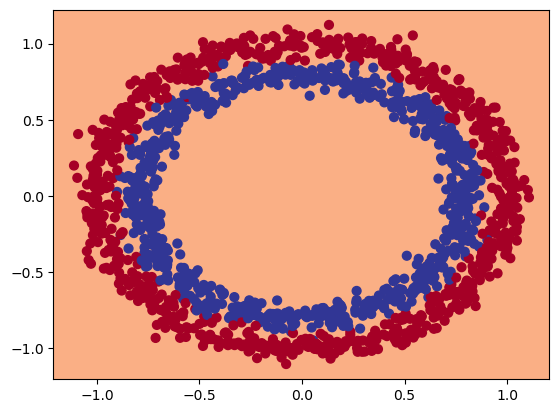

In [15]:
plot_decision_boundary(dumbModel, X_train, y_train)

In [17]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [19]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

Epoch [10/100], Loss: 0.7465, Acc: 0.0000
Epoch [20/100], Loss: 0.7428, Acc: 0.0000
Epoch [30/100], Loss: 0.7394, Acc: 0.0000
Epoch [40/100], Loss: 0.7362, Acc: 0.0000
Epoch [50/100], Loss: 0.7332, Acc: 0.0000
Epoch [60/100], Loss: 0.7304, Acc: 0.0000
Epoch [70/100], Loss: 0.7278, Acc: 7.1875
Epoch [80/100], Loss: 0.7254, Acc: 17.6250
Epoch [90/100], Loss: 0.7232, Acc: 24.4375
Epoch [100/100], Loss: 0.7211, Acc: 32.6250


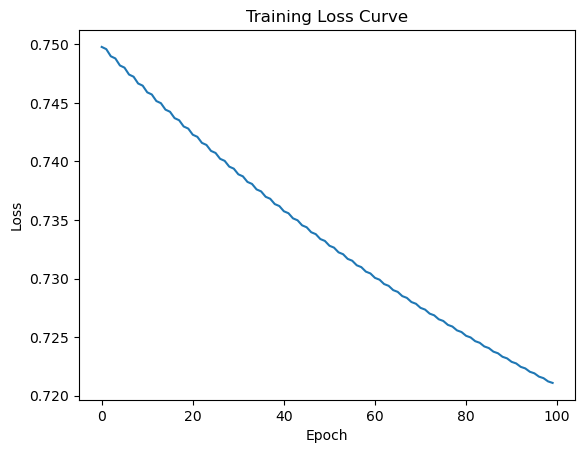

In [20]:
num_epochs = 100
loss_curve = []
acc_curve = []
for epoch in range(num_epochs):
    dumbModel.train()
    y_pred = dumbModel(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Print the loss every 10 epochs
    loss_curve.append(loss.item()) # This is so that we can look at an image of our loss
    acc_curve.append(accuracy_fn(y_train, y_pred.round()))
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Acc: {accuracy_fn(y_train, y_pred.round()):.4f}')
plot_loss(loss_curve)

NameError: name 'model_circle' is not defined

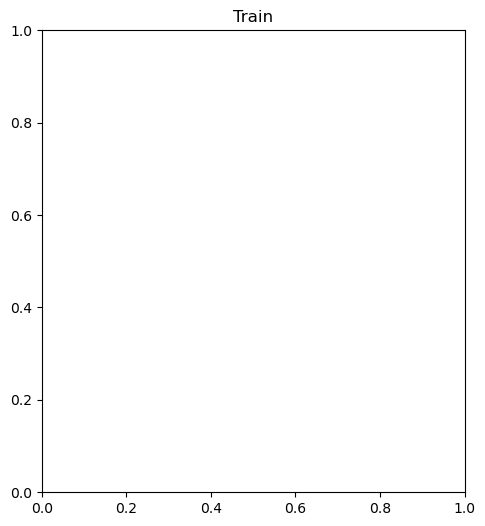

In [21]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

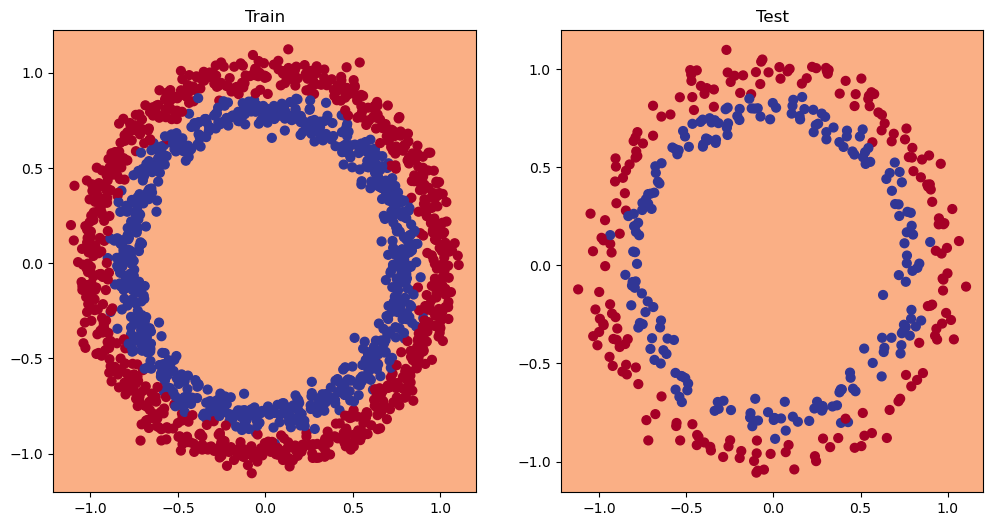

In [22]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(dumbModel, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(dumbModel, X_test, y_test)

In [23]:
# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
input_dummy

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [24]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(input_dummy)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

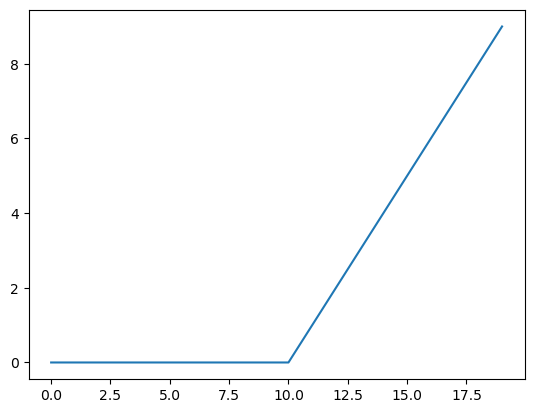

In [25]:
plt.plot(relu(input_dummy))

In [26]:
#ex6
class Model(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Model, self).__init__()
        self.layer1 = torch.nn.Linear(input_dim, 16) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(16, output_dim)
        
    def forward(self, x):
        x = self.layer2(self.activation(self.layer1(x)))
        return x
    
model = Model(2, 1)
model

Model(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (activation): ReLU()
  (layer2): Linear(in_features=16, out_features=1, bias=True)
)

Epoch [10/1000], Loss: 0.7178, Acc: 48.4375
Epoch [20/1000], Loss: 0.7157, Acc: 50.1875
Epoch [30/1000], Loss: 0.7138, Acc: 50.1875
Epoch [40/1000], Loss: 0.7121, Acc: 50.1875
Epoch [50/1000], Loss: 0.7106, Acc: 50.1875
Epoch [60/1000], Loss: 0.7092, Acc: 50.1875
Epoch [70/1000], Loss: 0.7080, Acc: 50.1875
Epoch [80/1000], Loss: 0.7070, Acc: 50.1875
Epoch [90/1000], Loss: 0.7060, Acc: 50.1875
Epoch [100/1000], Loss: 0.7052, Acc: 50.1875
Epoch [110/1000], Loss: 0.7044, Acc: 50.1875
Epoch [120/1000], Loss: 0.7037, Acc: 50.1875
Epoch [130/1000], Loss: 0.7031, Acc: 50.1875
Epoch [140/1000], Loss: 0.7025, Acc: 50.1875
Epoch [150/1000], Loss: 0.7019, Acc: 50.1875
Epoch [160/1000], Loss: 0.7015, Acc: 50.1875
Epoch [170/1000], Loss: 0.7010, Acc: 50.1875
Epoch [180/1000], Loss: 0.7006, Acc: 50.1875
Epoch [190/1000], Loss: 0.7002, Acc: 50.1875
Epoch [200/1000], Loss: 0.6999, Acc: 50.1875
Epoch [210/1000], Loss: 0.6996, Acc: 50.1875
Epoch [220/1000], Loss: 0.6993, Acc: 50.1875
Epoch [230/1000], L

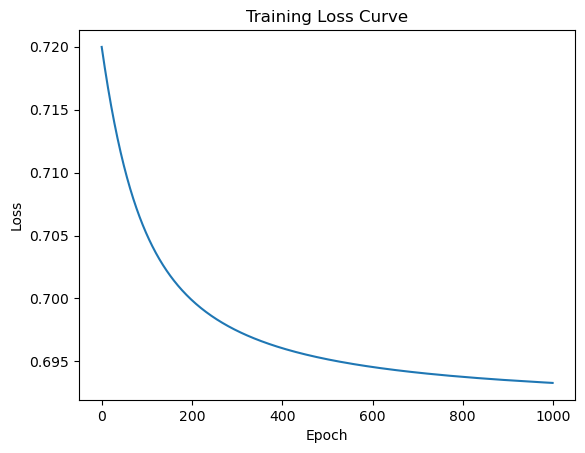

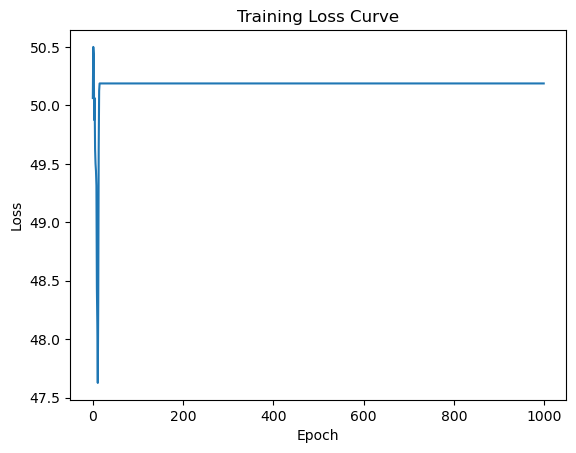

In [27]:
#ex7
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

num_epochs = 1000
loss_curve = []
acc_curve = []
for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train)
    y_pred = torch.nn.Sigmoid()(y_pred)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Print the loss every 10 epochs
    loss_curve.append(loss.item()) # This is so that we can look at an image of our loss
    acc_curve.append(accuracy_fn(y_train, y_pred.round()))
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Acc: {accuracy_fn(y_train, y_pred.round()):.4f}')
plot_loss(loss_curve)
plot_loss(acc_curve)

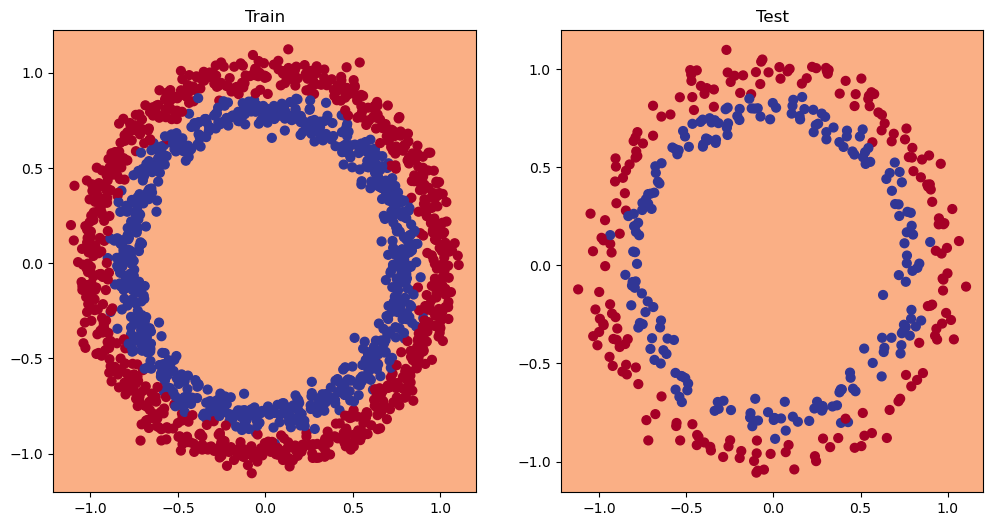

In [28]:
#ex8
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)